In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [36]:
df = pd.read_csv('iris.data')

In [37]:
df

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
df.info

<bound method DataFrame.info of       id  sepal_length  sepal_width  petal_length  petal_width         species
0      0           5.1          3.5           1.4          0.2     Iris-setosa
1      1           4.9          3.0           1.4          0.2     Iris-setosa
2      2           4.7          3.2           1.3          0.2     Iris-setosa
3      3           4.6          3.1           1.5          0.2     Iris-setosa
4      4           5.0          3.6           1.4          0.2     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  145           6.7          3.0           5.2          2.3  Iris-virginica
146  146           6.3          2.5           5.0          1.9  Iris-virginica
147  147           6.5          3.0           5.2          2.0  Iris-virginica
148  148           6.2          3.4           5.4          2.3  Iris-virginica
149  149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 6 colum

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
df = df.drop('id',axis = 1)

In [41]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
cols=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
df.rename(columns={cols[0]:0, cols[1]:1,cols[2]:2, cols[3]:3}, inplace=True)
df.loc[::50]

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [43]:
print(df.shape)

(150, 5)


In [44]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
df.species.value_counts()
#df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

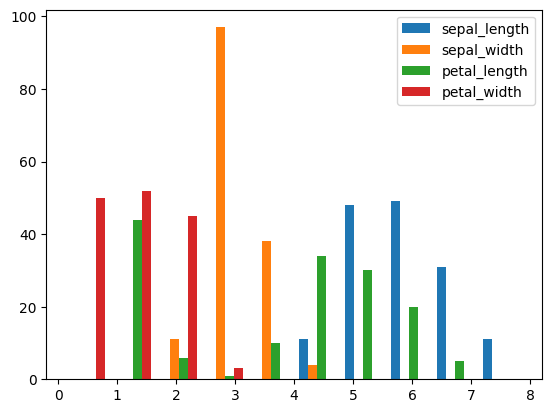

In [46]:
plt.hist([df[0],df[1],df[2],df[3]], label=[cols[0], cols[1],cols[2], cols[3]])
plt.legend()

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

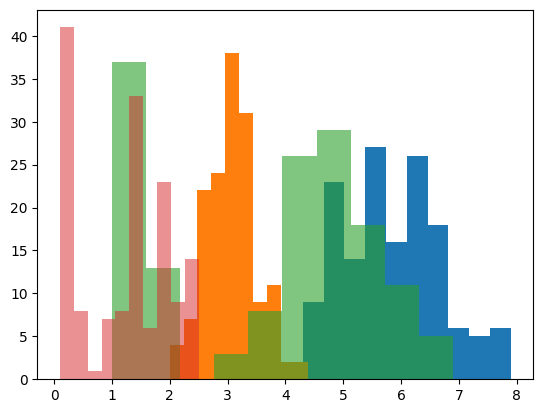

In [47]:
plt.hist(df[0])
plt.hist(df[1], alpha=1)
plt.hist(df[2], alpha=0.6)#alpha is for the transparency level
plt.hist(df[3], alpha=0.5)

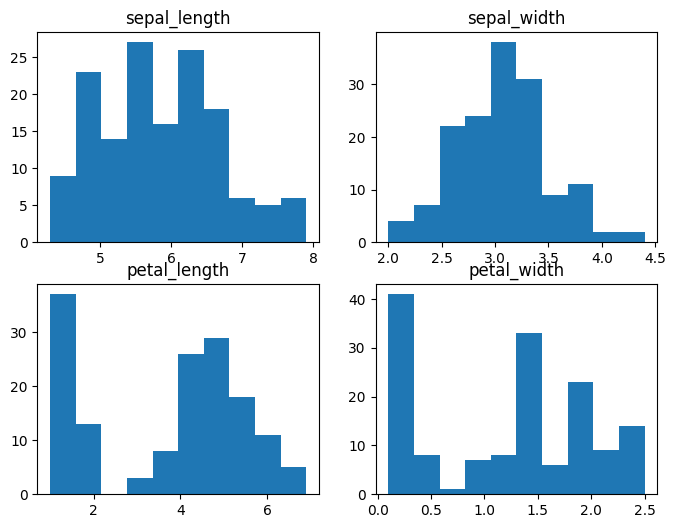

In [48]:
fig, ax =plt.subplots(2,2, figsize=(8,6))
ax[0,0].hist(df[0])
ax[0,1].hist(df[1])
ax[1,0].hist(df[2])
ax[1,1].hist(df[3])
ax[0,0].set_title(cols[0])
ax[0,1].set_title(cols[1])
ax[1,0].set_title(cols[2])
ax[1,1].set_title(cols[3])
plt.show()

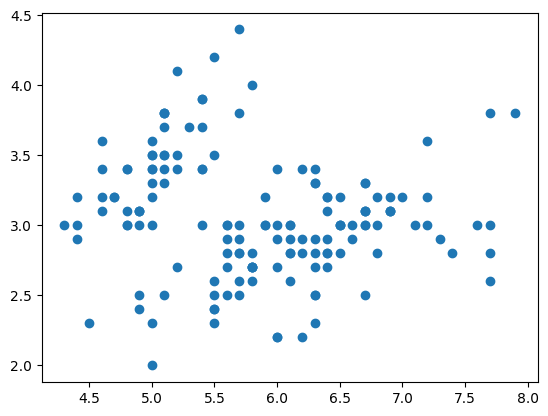

In [49]:
plt.scatter(
    df[0],
    df[1])

Text(0, 0.5, 'petal_width')

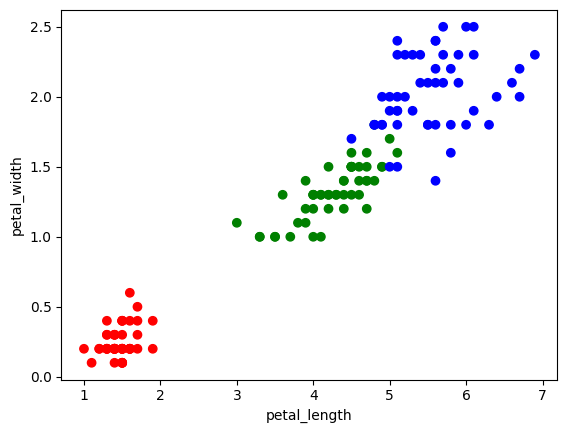

In [50]:
colors={'Iris-setosa':'red','Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    df[2],
    df[3],
    c=df['species'].map(colors))
plt.xlabel(cols[2])
plt.ylabel(cols[3])

Text(0, 0.5, 'petal_length')

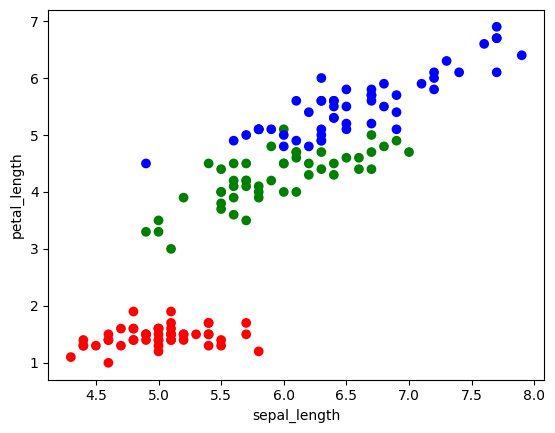

In [51]:
colors={'Iris-setosa':'red','Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    df[0],
    df[2],
    c=df['species'].map(colors))
plt.xlabel(cols[0])
plt.ylabel(cols[2])

Text(0.5, 1.0, 'Iris Data Scatter Plot')

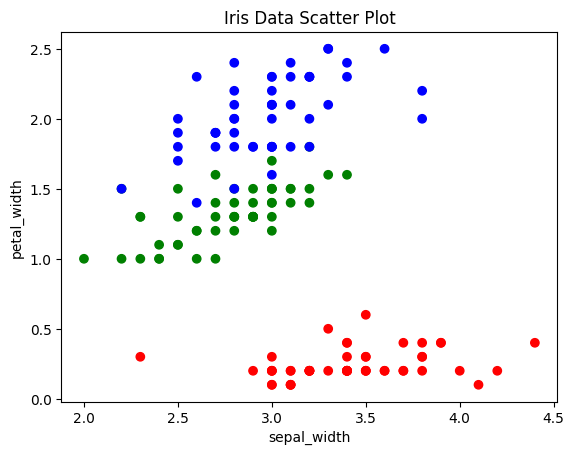

In [52]:
colors={'Iris-setosa':'red','Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    df[1],
    df[3],
    c=df['species'].map(colors))
plt.xlabel(cols[1])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')

In [53]:
df.corr(numeric_only=True)

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1e82f495310>,
 'caps': [<matplotlib.lines.Line2D at 0x1e82f495590>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e82f4951d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1e82f495810>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e82f495950>,
 'means': []}

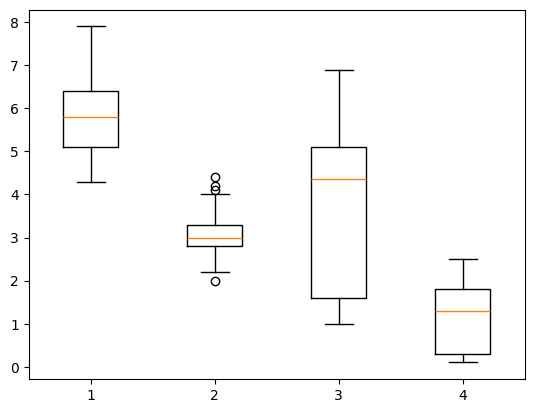

In [54]:
plt.boxplot([df[0],df[1],df[2],df[3]])

<Axes: title={'center': '0'}, xlabel='[species]'>

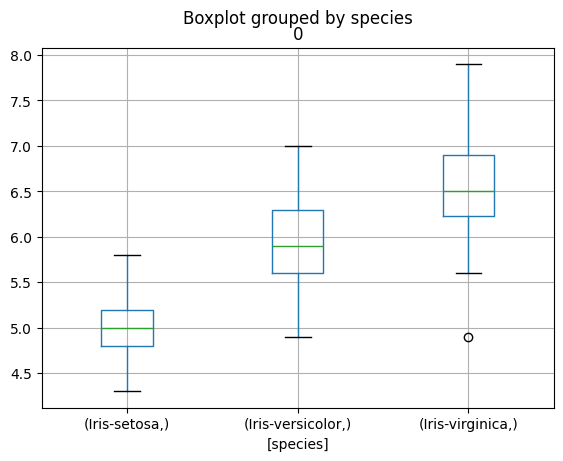

In [55]:
df.boxplot(column=[0], by=['species'])

Text(0.5, 1.0, 'petal_width')

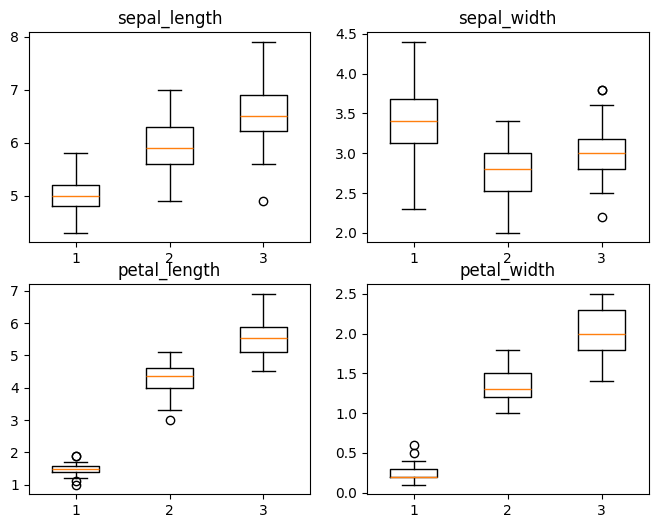

In [56]:
#setting up a 2x2 grid of subplots
fig, ax =plt.subplots(2,2, figsize=(8,6)) 

#Creating 4 lists each containing data for all 3 species of the Iris dataset corresponding to the 4 Columns.
A= [df[0][df.species == 'Iris-setosa'],df[0][df.species == 'Iris-versicolor'],df[0][df.species == 'Iris-virginica']]
B= [df[1][df.species == 'Iris-setosa'],df[1][df.species == 'Iris-versicolor'],df[1][df.species == 'Iris-virginica']]
C= [df[2][df.species == 'Iris-setosa'],df[2][df.species == 'Iris-versicolor'],df[2][df.species == 'Iris-virginica']]
D= [df[3][df.species == 'Iris-setosa'],df[3][df.species == 'Iris-versicolor'],df[3][df.species == 'Iris-virginica']]

#Plotting the data in multiple BoxPlots
ax[0, 0].boxplot(A, widths =0.5) #widths lets us set the width of the Boxplot
ax[0, 0].set_title(cols[0])
ax[0, 1].boxplot(B, widths =0.5)
ax[0, 1].set_title(cols[1])
ax[1, 0].boxplot(C, widths =0.5)
ax[1, 0].set_title(cols[2])
ax[1, 1].boxplot(D, widths =0.5)
ax[1, 1].set_title(cols[3])

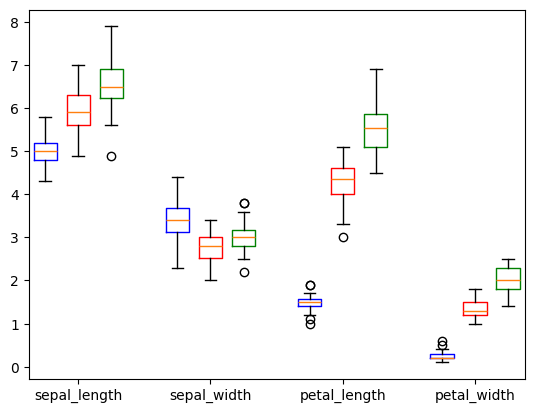

In [57]:
#Merging everything to a Single Plot

#Define color schemes
def set_color(bp):
    plt.setp(bp['boxes'][0], color='blue')
    plt.setp(bp['boxes'][1], color='red')
    plt.setp(bp['boxes'][2], color='Green')

A= [df[0][df.species == 'Iris-setosa'],df[0][df.species == 'Iris-versicolor'],df[0][df.species == 'Iris-virginica']]
B= [df[1][df.species == 'Iris-setosa'],df[1][df.species == 'Iris-versicolor'],df[1][df.species == 'Iris-virginica']]
C= [df[2][df.species == 'Iris-setosa'],df[2][df.species == 'Iris-versicolor'],df[2][df.species == 'Iris-virginica']]
D= [df[3][df.species == 'Iris-setosa'],df[3][df.species == 'Iris-versicolor'],df[3][df.species == 'Iris-virginica']]

#Adding 0, '', to remove the outliers

bp = plt.boxplot(A, notch=False, positions = [1,2,3], widths = 0.7)
set_color(bp)
bp = plt.boxplot(B, notch=False, positions = [5,6,7], widths = 0.7)
set_color(bp)
bp = plt.boxplot(C, notch=False, positions = [9,10,11], widths = 0.7)
set_color(bp)
bp = plt.boxplot(D, notch=False, positions = [13,14,15], widths = 0.7)
set_color(bp)

ax=plt.gca() #gca is get current axes
ax.set_xticks([2, 6, 10, 14])
ax.set_xticklabels(cols)

plt.show()  

<function matplotlib.pyplot.show(close=None, block=None)>

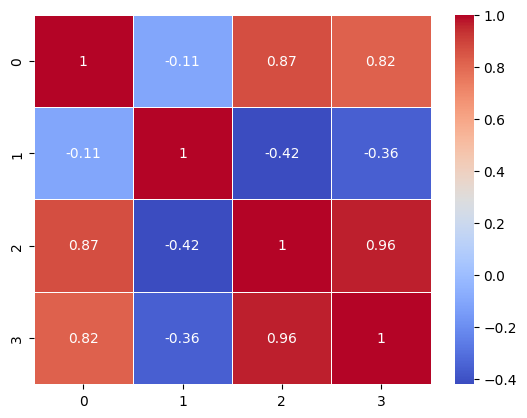

In [58]:
#Heatmap (Correlation Matrix)
corr = df.corr(numeric_only=True)
#Red(closer to 1)-> Shows how correlated the data is, Blue(closer to -1)-> Shows how correlated the data is, White(Around 0)
sns.heatmap(corr, annot=True,cmap="coolwarm",linewidths=0.5)
plt.show

In [59]:
corr

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


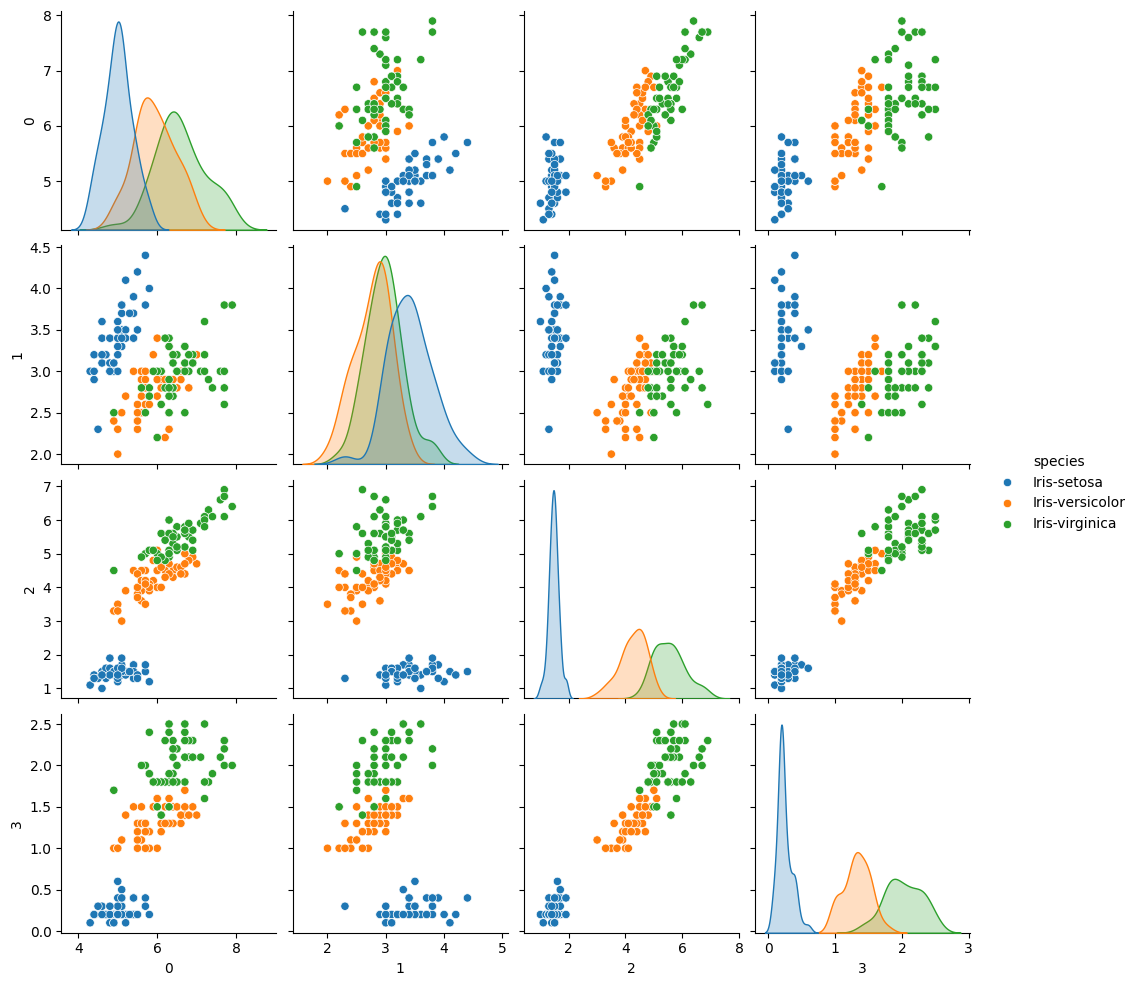

In [73]:
#PairPlot
sns.pairplot(df, hue="species", diag_kind="kde")
#	0 = sepal_length, 	1 = sepal_width, 	2 = petal_length,	3 = petal_width	

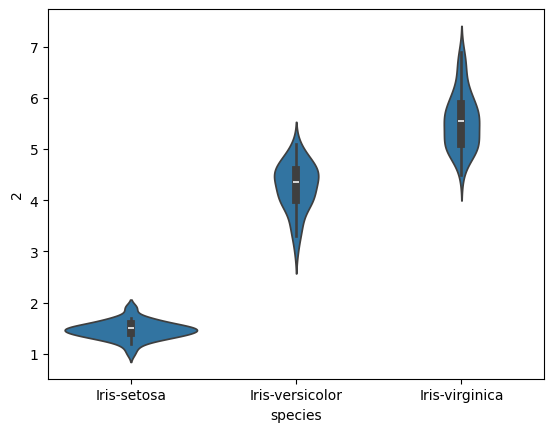

In [80]:
#Violin plot - The width of the plot at different values indicates the density of the data at those values. 
#Wider sections represent a higher probability of data points occurring at that value, while narrower sections indicate lower probability.
sns.violinplot(x="species", y=2, data = df)
plt.show()

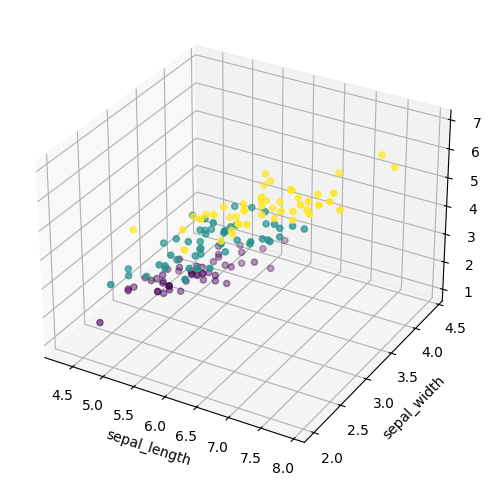

In [85]:
#3D Scatter plot
#Plotted this only for visualization purpose

fig = plt.figure(figsize = (8,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df[0],df[1],df[2],c=df["species"].astype('category').cat.codes)
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")
plt.show()

In [87]:
df

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


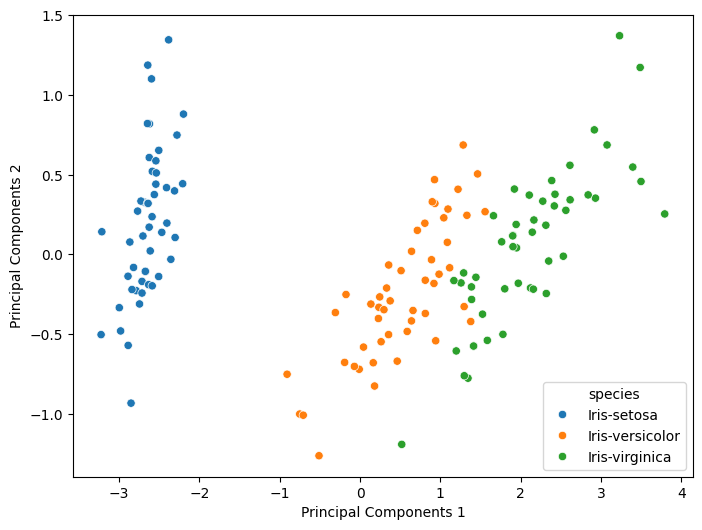

In [93]:
#Principal Component Analysis
#Principal components are new variables created by linearly combining the original features in a dataset.
pca=PCA(n_components =2)
iris_pca=pca.fit_transform(df.drop(columns=["species"]))

plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_pca[:,0], y=iris_pca[:,1], hue=df["species"])
plt.xlabel("Principal Components 1")
plt.ylabel("Principal Components 2")
plt.show()

In [95]:
#I will use KNN - K nearest neighbors for ML classification of the above data
train = df
train

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [96]:
train['distance'] = 9999
train.head()

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,9999
1,4.9,3.0,1.4,0.2,Iris-setosa,9999
2,4.7,3.2,1.3,0.2,Iris-setosa,9999
3,4.6,3.1,1.5,0.2,Iris-setosa,9999
4,5.0,3.6,1.4,0.2,Iris-setosa,9999


In [97]:
#We will use the Euclidean distance
target = pd.Series([7.0,3.1,5.6,1.9])
target

0    7.0
1    3.1
2    5.6
3    1.9
dtype: float64

In [99]:
train['distance']=((train.loc[:,0]-target[0])**2 + (train.loc[:,1]-target[1])**2 + (train.loc[:,2]-target[2])**2 + (train.loc[:,3]-target[3])**2)**0.5
train.loc[::10]

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,4.929503
10,5.4,3.7,1.5,0.2,Iris-setosa,4.756049
20,5.4,3.4,1.7,0.2,Iris-setosa,4.555217
30,4.8,3.1,1.6,0.2,Iris-setosa,4.871345
40,5.0,3.5,1.3,0.3,Iris-setosa,5.020956
50,7.0,3.2,4.7,1.4,Iris-versicolor,1.034408
60,5.0,2.0,3.5,1.0,Iris-versicolor,3.229551
70,5.9,3.2,4.8,1.8,Iris-versicolor,1.367479
80,5.5,2.4,3.8,1.1,Iris-versicolor,2.572936
90,5.5,2.6,4.4,1.2,Iris-versicolor,2.104757


In [100]:
k=7
train=train.sort_values('distance', ascending=True)
knn = list(train.head(k).species)
knn

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

In [102]:
from statistics import mode
print(mode(knn))

Iris-virginica


Text(0.5, 1.0, 'Iris Data Scatter Plot')

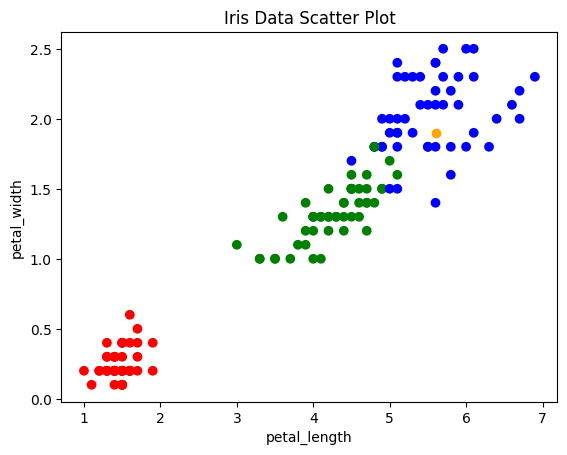

In [103]:
colors={'Iris-setosa':'red','Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    train[2],
    train[3],
    c=train['species'].map(colors))
plt.scatter(target[2], target[3], c='orange')
plt.xlabel(cols[2])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')

In [105]:
#Test via SKlearn

data = df.values

X = data[:,0:4]
Y = data[:,4]

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [110]:
# Model - Support Vector machine Algorithm

from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, Y_train)

SVC()

In [113]:
#Predict the value using the Testing dataset
prediction1 = model_svc.predict(X_test)

In [116]:
#Calculate the Accuracy of the Prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, prediction1)*100)

100.0


In [117]:
for i in range(len(prediction1)):
    print(Y_test[i], prediction1[i])

Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica


In [130]:
# A detailed classification Report

from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Precision: This measures the accuracy of the positive predictions. For example, the precision for Iris-setosa is 1.00, meaning all instances classified as Iris-setosa are indeed Iris-setosa.
# Recall: This measures the ability of the model to find all relevant instances in the dataset. For Iris-virginica, the recall is 1.00, indicating that the model correctly identified all Iris-virginica instances.
# F1-Score: This is the harmonic mean of precision and recall, providing a single metric that balances both concerns. High F1-scores across all classes indicate a well-performing model.
# Support: This is the number of actual occurrences of each class in the dataset. For example, there are 9 instances of Iris-setosa.
# Accuracy: This is the overall correctness of the model, calculated as the ratio of correctly predicted instances to the total instances. An accuracy of 0.97 means the model correctly predicted 97% of the instances.
# Macro Average: This is the average of the precision, recall, and F1-score for all classes, treating all classes equally.
# Weighted Average: This is the average of the precision, recall, and F1-score for all classes, weighted by the number of instances in each class.

In [118]:
# Model 2 - logistic regression
from sklearn.linear_model import LogisticRegression

model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)


LogisticRegression()

In [119]:
#Preditions using the LR model
prediction2 = model_LR.predict(X_test)

In [120]:
#Calculating the accuracy
print(accuracy_score(Y_test,prediction2)*100)

96.66666666666667


In [123]:
# Printing the data to check which was classified wrongly
for i in range(len(prediction1)):
    print(Y_test[i], prediction2[i])
#There was 1 mistake made by the ML to predict 
# Original Value - Iris-versicolor 
# Predicted Value - Iris-virginica

Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica


In [131]:
# A detailed classification Report

from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [127]:
# Model 3 - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)


DecisionTreeClassifier()

In [128]:
prediction3 = model_svc.predict(X_test)

In [129]:
# Calculate the accuracy
print(accuracy_score(Y_test, prediction3))

1.0


In [132]:
# A detailed classification Report

from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

